## num 2 layer autoencoder

In [24]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
if type(tf.contrib) != type(tf): tf.contrib._warning = None
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import time
import data_processing
import gc
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt

'''
num_hidden_1=155,
num_hidden_2=81,
num_hidden_3=27,
num_hidden_4=9,
num_hidden_5=3,

'''

In [25]:
def binary_to_dec(recommendering_user):
    dec_array = []
    for i in range(636):
        first = i * 5
        second = i * 5 + 1
        third = i * 5 + 2
        fourth = i * 5 + 3
        fifth = i * 5 + 4

        value = recommendering_user[first] * (2 ** 4) + recommendering_user[second] * (2 ** 3) + \
                recommendering_user[third] * (2 ** 2) + recommendering_user[fourth] * (2 ** 1) + recommendering_user[fifth]

        dec_array.append(value)

    return dec_array

def binary_matrix_to_dec_matrix(recommendering_user):
    result = []
    for i in range(len(recommendering_user)):
        result.append( binary_to_dec(recommendering_user[i]) )
    return result

def loss_function_accuracy_difference_between_true_label_and_probability(training_data_accuracy,true_label,true_positive,false_negative,false_positive):

    if true_label == 16 :
        normalised_true_label = 0
    else:
        normalised_true_label = 1
    result = np.abs((training_data_accuracy-normalised_true_label))

    # prediction is 1 whereas true label is 1
    if training_data_accuracy > 0.5 and normalised_true_label == 1:
        true_positive = true_positive + 1

    if training_data_accuracy < 0.5 and normalised_true_label == 1:
        false_negative = false_negative + 1

    if training_data_accuracy > 0.5 and normalised_true_label == 0:
        false_positive = false_positive+1

    return result,true_positive,false_negative,false_positive

def loss_function_accuracy_difference_between_true_label_and_prediction(training_data_accuracy,true_label,true_positive,false_negative,false_positive):
    if true_label == 16 :
        normalised_true_label = 0
    else:
        normalised_true_label = 1

    if training_data_accuracy>0.5:
        predicted_value = 1
    else:
        predicted_value = 0
    result = np.abs((normalised_true_label-predicted_value))

    # prediction is 1 whereas true label is 1
    if training_data_accuracy > 0.5 and normalised_true_label == 1:
        true_positive = true_positive + 1

    if training_data_accuracy < 0.5 and normalised_true_label == 1:
        false_negative = false_negative + 1

    if training_data_accuracy > 0.5 and normalised_true_label == 0:
        false_positive = false_positive + 1

    return result,true_positive,false_negative,false_positive

def fill_the_clusters(label_pred):
    clusters = {}
    for index, cluster_index in enumerate(label_pred):
        if cluster_index not in clusters.keys():
            clusters[cluster_index] = [ original_training_data[index] ]
        else:
            clusters[cluster_index].append(original_training_data[index])
    return clusters

def run_kmeans(n_clusters):
    clusters = {}
    estimator = KMeans(n_clusters=n_clusters)
    estimator.fit(compressed_training_data)
    label_pred = estimator.labels_
    centroids = estimator.cluster_centers_
    centroids = np.asarray(centroids)

    return estimator,label_pred,centroids

def calculate_loss(clusters):

    loss_difference_between_true_label_and_probability = []

    true_positive = 0
    false_negative = 0
    false_positive = 0

    for i in range( len(compressed_testing_data) ):# for every test case

        label = estimator.predict(np.reshape(compressed_testing_data[i],(1,-1)))

        tempt = np.copy( clusters[label[0]] )

        recommendering_user_binary = np.copy(original_testing_data[i])

        recommendering_user = binary_to_dec(recommendering_user_binary)

        new_matrix = binary_matrix_to_dec_matrix( tempt )

        row_index = np.shape(new_matrix)[0]

        poll_num = len(recommendering_user)
        individual_accuracy = []

        true_positive = 0
        false_negative = 0
        false_positive = 0


        a = range(poll_num)

        for j in range(poll_num): # for every poll of this test user
            true_label =recommendering_user[j]

            true = 0
            training_count = 0


            if recommendering_user[j] != 0 :
                for k in range(row_index):
                    new_matrix = np.asarray(new_matrix)
                    column = new_matrix[:,j]

                    # 16 means the user skips the poll
                    if column[k] != 16 and column[k] != 0:
                        true = true + 1
                    if column[k] !=0:
                        training_count = training_count+1

                if training_count != 0 and recommendering_user[j] != 0:
                    training_data_accuracy = true/training_count
                    the_loss_of_each_poll,true_positive,false_negative,false_positive = loss_function_accuracy_difference_between_true_label_and_probability(training_data_accuracy,true_label,true_positive,false_negative,false_positive)
                    individual_accuracy.append(the_loss_of_each_poll)

        the_loss_of_a_user = np.average(individual_accuracy)
        loss_difference_between_true_label_and_probability.append(the_loss_of_a_user)

    return loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive

def calculate_loss2(clusters):

    loss_difference_between_true_label_and_probability = []

    true_positive = 0
    false_negative = 0
    false_positive = 0

    for i in range( len(compressed_testing_data) ):# for every test case

        label = estimator.predict(np.reshape(compressed_testing_data[i],(1,-1)))

        tempt = np.copy( clusters[label[0]] )

        recommendering_user_binary = np.copy(original_testing_data[i])

        recommendering_user = binary_to_dec(recommendering_user_binary)

        new_matrix = binary_matrix_to_dec_matrix( tempt )

        row_index = np.shape(new_matrix)[0]

        poll_num = len(recommendering_user)
        individual_accuracy = []

        true_positive = 0
        false_negative = 0
        false_positive = 0


        a = range(poll_num)

        for j in range(poll_num): # for every poll of this test user
            true_label =recommendering_user[j]

            true = 0
            training_count = 0


            if recommendering_user[j] != 0 :
                for k in range(row_index):
                    new_matrix = np.asarray(new_matrix)
                    column = new_matrix[:,j]

                    # 16 means the user skips the poll
                    if column[k] != 16 and column[k] != 0:
                        true = true + 1
                    if column[k] !=0:
                        training_count = training_count+1

                if training_count != 0 and recommendering_user[j] != 0:
                    training_data_accuracy = true/training_count
                    the_loss_of_each_poll,true_positive,false_negative,false_positive = loss_function_accuracy_difference_between_true_label_and_prediction(training_data_accuracy,true_label,true_positive,false_negative,false_positive)
                    individual_accuracy.append(the_loss_of_each_poll)

        the_loss_of_a_user = np.average(individual_accuracy)
        loss_difference_between_true_label_and_probability.append(the_loss_of_a_user)

    return loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive

In [26]:
class autoencoder(object):# 155 27 128 101 74
    def __init__(self,num_epochs, display_step=100, learning_rate=0.1, batch_size=100,
                 denoising=False, new_poll_weight=0.002,masking=0, num_layers=1, num_hidden_1=155,
                 num_hidden_2=81,num_hidden_3=27,num_hidden_4=9,num_hidden_5=3,continue_from_saved=False, time_decay=1):

        self.data_provider = data_processing.data_provider('/Users/caesar/PycharmProjects/my_honours_project/src/this_that.json')
        self.data_provider.parse()
        # Interactions are fed as binary but using decimal helps with adding 2 interactions together
        self.interaction_dict = {'skips': 16,
            'owns': 8,
            'tracks': 4,
            'comment': 2,
            'vote': 1
        }

        self.polls = self.data_provider.polls  # [:50]
        self.num_engagements = len(self.interaction_dict)

        self.num_input = len(self.polls) * self.num_engagements
        tf.set_random_seed(1)

        self.users = self.data_provider.users#[:50]

        self.test_polls = self.data_provider.polls#[500:]
        self.num_epochs = num_epochs # initial training eppchs given training data
        self.display_step = display_step # display training loss every x epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.denoising = denoising # whether to add noise to the input vectors - might help with accidental interactions
        self.new_poll_weight = new_poll_weight # How much weight new polls are given in the output layer (gives new polls some initial traction)
        self.masking = masking # TODO: Add masking to data to make synthetic users with less interactions and see if it helps
        self.num_layers = num_layers
        self.num_hidden_1 = num_hidden_1
        self.num_hidden_2 = num_hidden_2
        self.num_hidden_3 = num_hidden_3
        self.num_hidden_4 = num_hidden_4
        self.num_hidden_5 = num_hidden_5
        self.continue_from_saved = continue_from_saved
        self.train= self.data_provider.train
        self.test = self.data_provider.test
        self.validation = self.data_provider.validation
        self.test_users = []
        self.time_decay = time_decay
        self.X = tf.compat.v1.placeholder("float", [None, None])
        self.Y = tf.compat.v1.placeholder("float", [None, None])
        self.saver = None

        self.compressed_train = []
        self.compressed_test = []

        self.weights2 = {
            'encoder_h1': tf.Variable(tf.random_normal([self.num_input, self.num_hidden_1])),
            'encoder_h2': tf.Variable(tf.random_normal([self.num_hidden_1, self.num_hidden_2])),
            'encoder_h3': tf.Variable(tf.random_normal([self.num_hidden_2, self.num_hidden_3])),
            'encoder_h4': tf.Variable(tf.random_normal([self.num_hidden_3, self.num_hidden_4])),
            'decoder_h1': tf.Variable(tf.random_normal([self.num_hidden_2, self.num_hidden_1])),
            'decoder_h2': tf.Variable(tf.random_normal([self.num_hidden_1, self.num_input])),
        }
        self.biases2 = {
            'encoder_b1': tf.Variable(tf.random_normal([self.num_hidden_1])),
            'encoder_b2': tf.Variable(tf.random_normal([self.num_hidden_2])),
            'encoder_b3': tf.Variable(tf.random_normal([self.num_hidden_3])),
            'encoder_b4': tf.Variable(tf.random_normal([self.num_hidden_4])),
            'encoder_b5': tf.Variable(tf.random_normal([self.num_hidden_5])),
            'decoder_b1': tf.Variable(tf.random_normal([self.num_hidden_1])),
            'decoder_b2': tf.Variable(tf.random_normal([self.num_input])),
        }


        self.encoder_op = self.encoder(self.X)
        self.decoder_op = self.decoder(self.encoder_op)
        self.setup_graph()

        self.train_and_predict()

    def encoder(self, x):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, self.weights2['encoder_h1']),self.biases2['encoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights2['encoder_h2']),self.biases2['encoder_b2']))


        return layer_2

    def decoder(self, x):

        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, self.weights2['decoder_h1']),self.biases2['decoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights2['decoder_h2']), self.biases2['decoder_b2']))

        return layer_2

    def setup_graph(self):

        # Prediction
        self.y_pred = self.decoder_op

        self.y_true = self.Y
        self.loss = self._loss()
        self.optimizer = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)

        self.init = tf.global_variables_initializer()
        self.saver = tf.train.Saver()

    def _loss(self):
        return tf.reduce_mean(tf.pow(self.y_true - self.y_pred, 2))

    def train_and_predict(self, save=True):
        gc.collect()

        f = open("guru99.txt", "w+")

        with tf.Session() as sess:

            sess.run(tf.global_variables_initializer())

            train_loss = []
            validation_loss = []
            t0 = time.time()

            for i in range(0,self.num_epochs):

                batch_x = self.train[np.random.choice(self.train.shape[0], self.batch_size, replace=True), :]
                batch_y = np.copy(batch_x)

                _, l = sess.run([self.optimizer, self.loss], feed_dict={self.X: batch_x, self.Y: batch_y})
                train_loss.append(l)


                # print("the minibatch loss for epoch %d is %f"% (i,l));

                f.write("%f\r\n" % l)

                l = sess.run(self.loss, feed_dict={self.X: self.validation, self.Y: self.validation})
                validation_loss.append(l)
                if save and (i == 0 or i % self.display_step == 0):
                    self.saver.save(sess, 'refactored/model.ckpt')

            train_encoder_result = sess.run(self.encoder_op, feed_dict={self.X: self.train})
            test_encoder_result = sess.run(self.encoder_op, feed_dict={self.X: self.test})

            print()

            self.compressed_train = np.copy(train_encoder_result)
            self.compressed_test = np.copy(test_encoder_result)
            # print(test_encoder_result)

            xs = np.arange(1,self.num_epochs+1,1)
            ys = train_loss

            plt.plot(xs, ys,color = 'b')
            xs = np.arange(1, self.num_epochs+1, 1)
            ys = validation_loss
            plt.plot(xs, ys,color = 'r')
            plt.show()

            print('autoencoder finished')
        sess.close()

# training epoch is 10000

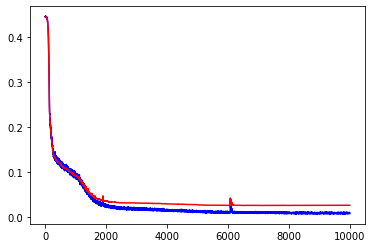

autoencoder finished


In [27]:

a = autoencoder(num_epochs=10000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test



# loss_function_accuracy_difference_between_true_label_and_probability

In [ ]:

overall_true_positive = 0
overall_false_negative = 0
overall_false_positive = 0

#n_clusters =20
range_of_cluster = 30
train_loss = []
recall_list = []
precision_list = []
for n_clusters in np.arange(1,range_of_cluster+1):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)



    loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive = calculate_loss(clusters)

    #print("true positive is : ",true_positive)
    #print("true positive is : ", false_negative)
    #print("true positive is : ", false_positive)
    #overall_true_positive = overall_true_positive + true_positive
    #overall_false_negative = overall_false_negative + false_negative
    #overall_false_positive = overall_false_positive + false_positive

    recall = true_positive/(true_positive+false_negative)
    precision = true_positive/(true_positive+false_positive)
    recall_list.append(recall)
    precision_list.append(precision)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


loss_difference_between_true_label_and_probability : 0.10387611758689336
loss_difference_between_true_label_and_probability : 0.09699644470155398
loss_difference_between_true_label_and_probability : 0.09050953535932257
loss_difference_between_true_label_and_probability : 0.08925515026573505
loss_difference_between_true_label_and_probability : 0.09771480477016828
loss_difference_between_true_label_and_probability : 0.09899216643592218
loss_difference_between_true_label_and_probability : 0.08460665412046467
loss_difference_between_true_label_and_probability : 0.08413833931640771
loss_difference_between_true_label_and_probability : 0.08851844192125999
loss_difference_between_true_label_and_probability : 0.0822609793139091
loss_difference_between_true_label_and_probability : 0.08486291392573893
loss_difference_between_true_label_and_probability : 0.08007206123942094
loss_difference_between_true_label_and_probability : 0.07398233637932741
loss_difference_between_true_label_and_probability :

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = recall_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = precision_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
plt.show()

# loss_function_accuracy_difference_between_true_label_and_prediction

In [ ]:
overall_true_positive = 0
overall_false_negative = 0
overall_false_positive = 0

#n_clusters =20
range_of_cluster = 30
train_loss = []
recall_list = []
precision_list = []
for n_clusters in np.arange(1,range_of_cluster+1):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)



    loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive = calculate_loss2(clusters)

    #print("true positive is : ",true_positive)
    #print("true positive is : ", false_negative)
    #print("true positive is : ", false_positive)
    #overall_true_positive = overall_true_positive + true_positive
    #overall_false_negative = overall_false_negative + false_negative
    #overall_false_positive = overall_false_positive + false_positive

    recall = true_positive/(true_positive+false_negative)
    precision = true_positive/(true_positive+false_positive)
    recall_list.append(recall)
    precision_list.append(precision)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = recall_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = precision_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
plt.show()

# training epoch is 9000

In [ ]:

a = autoencoder(num_epochs=9000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test




# loss_function_accuracy_difference_between_true_label_and_probability

In [ ]:
range_of_cluster = 20
train_loss = []
recall_list = []
precision_list = []
for n_clusters in np.arange(1,range_of_cluster+1):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive = calculate_loss(clusters)

    #print("true positive is : ",true_positive)
    #print("true positive is : ", false_negative)
    #print("true positive is : ", false_positive)
    #overall_true_positive = overall_true_positive + true_positive
    #overall_false_negative = overall_false_negative + false_negative
    #overall_false_positive = overall_false_positive + false_positive

    recall = true_positive/(true_positive+false_negative)
    precision = true_positive/(true_positive+false_positive)
    recall_list.append(recall)
    precision_list.append(precision)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = recall_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = precision_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
plt.show()

# loss_function_accuracy_difference_between_true_label_and_prediction

In [ ]:
overall_true_positive = 0
overall_false_negative = 0
overall_false_positive = 0

#n_clusters =20
range_of_cluster = 30
train_loss = []
recall_list = []
precision_list = []
for n_clusters in np.arange(1,range_of_cluster+1):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)



    loss_difference_between_true_label_and_probability,true_positive,false_negative,false_positive = calculate_loss2(clusters)

    #print("true positive is : ",true_positive)
    #print("true positive is : ", false_negative)
    #print("true positive is : ", false_positive)
    #overall_true_positive = overall_true_positive + true_positive
    #overall_false_negative = overall_false_negative + false_negative
    #overall_false_positive = overall_false_positive + false_positive

    recall = true_positive/(true_positive+false_negative)
    precision = true_positive/(true_positive+false_positive)
    recall_list.append(recall)
    precision_list.append(precision)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = recall_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)

In [ ]:
xs = np.arange(1,range_of_cluster+1)
ys = precision_list
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(range_of_cluster,-1))
ax.plot(xs, ys)
plt.show()

# training epoch is 8000

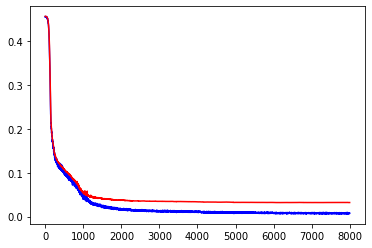

autoencoder finished


In [44]:
a = autoencoder(num_epochs=8000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.11193346437880278
loss_difference_between_true_label_and_probability : 0.11000678256396206
loss_difference_between_true_label_and_probability : 0.10853121769891533
loss_difference_between_true_label_and_probability : 0.1064816334204767
loss_difference_between_true_label_and_probability : 0.09880521953186056
loss_difference_between_true_label_and_probability : 0.09810381905777733
loss_difference_between_true_label_and_probability : 0.09808934636198677
loss_difference_between_true_label_and_probability : 0.09911383131630085
loss_difference_between_true_label_and_probability : 0.09128646202083493
loss_difference_between_true_label_and_probability : 0.08792030217180963
loss_difference_between_true_label_and_probability : 0.09060209807438795
loss_difference_between_true_label_and_probability : 0.09124939115905507
loss_difference_between_true_label_and_probability :

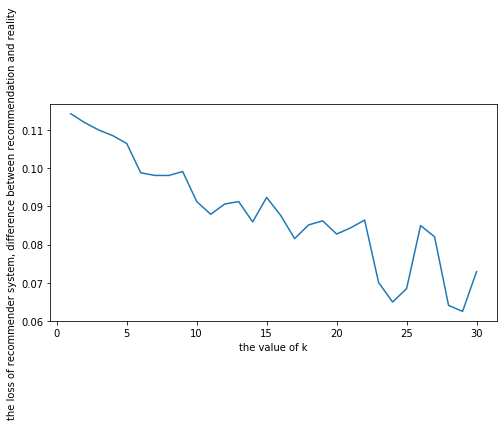

----------------------------- the execution ends here -----------------------------------------


In [45]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.06699971083905806
loss_difference_between_true_label_and_probability : 0.06958248372917554
loss_difference_between_true_label_and_probability : 0.06394015291630428
loss_difference_between_true_label_and_probability : 0.06453853409587752
loss_difference_between_true_label_and_probability : 0.06566602209860435
loss_difference_between_true_label_and_probability : 0.06626766136935204
loss_difference_between_true_label_and_probability : 0.06394825494165868
loss_difference_between_true_label_and_probability : 0.061199352766242346
loss_difference_between_true_label_and_probability : 0.060739065239006726
loss_difference_between_true_label_and_probability : 0.06438208077601182
loss_difference_between_true_label_and_probability : 0.061951409662792986
loss_difference_between_true_label_and_probability : 0.058828056962225844
loss_difference_between_true_label_and_probabil

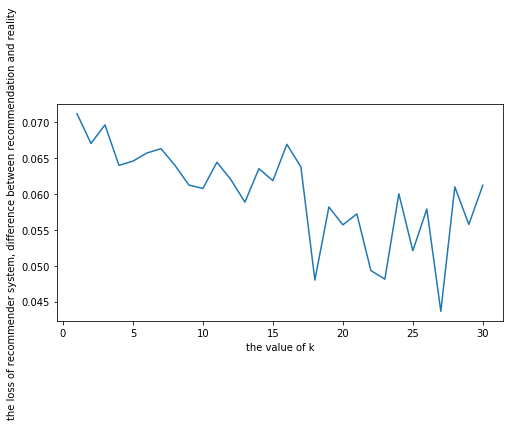

----------------------------- the execution ends here -----------------------------------------


In [46]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

# training epoch is 7000

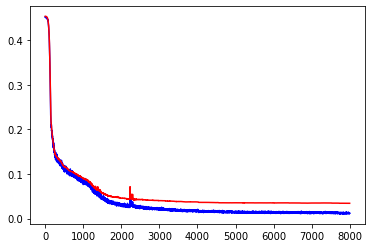

autoencoder finished


In [47]:
a = autoencoder(num_epochs=7000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.1126543452651828
loss_difference_between_true_label_and_probability : 0.10948774396545174
loss_difference_between_true_label_and_probability : 0.1015588418411531
loss_difference_between_true_label_and_probability : 0.10581769758510043
loss_difference_between_true_label_and_probability : 0.09386319786162212
loss_difference_between_true_label_and_probability : 0.09905257686007811
loss_difference_between_true_label_and_probability : 0.09521605742863605
loss_difference_between_true_label_and_probability : 0.09132139122950574
loss_difference_between_true_label_and_probability : 0.09089431477556664
loss_difference_between_true_label_and_probability : 0.08309079876491485
loss_difference_between_true_label_and_probability : 0.09242937726755662
loss_difference_between_true_label_and_probability : 0.0903629306006325
loss_difference_between_true_label_and_probability : 0

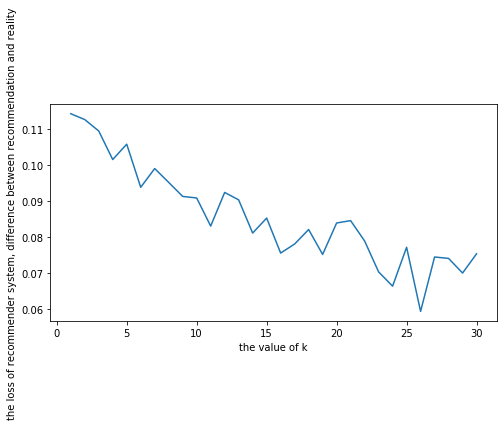

----------------------------- the execution ends here -----------------------------------------


In [48]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.07063820650066452
loss_difference_between_true_label_and_probability : 0.07189834679500681
loss_difference_between_true_label_and_probability : 0.06699499099999233
loss_difference_between_true_label_and_probability : 0.07025070528921734
loss_difference_between_true_label_and_probability : 0.06933360979065781
loss_difference_between_true_label_and_probability : 0.061696390998844566
loss_difference_between_true_label_and_probability : 0.06568820675549461
loss_difference_between_true_label_and_probability : 0.06195793831288723
loss_difference_between_true_label_and_probability : 0.06219901596869199
loss_difference_between_true_label_and_probability : 0.06623268742828307
loss_difference_between_true_label_and_probability : 0.06555823540247518
loss_difference_between_true_label_and_probability : 0.05825440022860662
loss_difference_between_true_label_and_probability

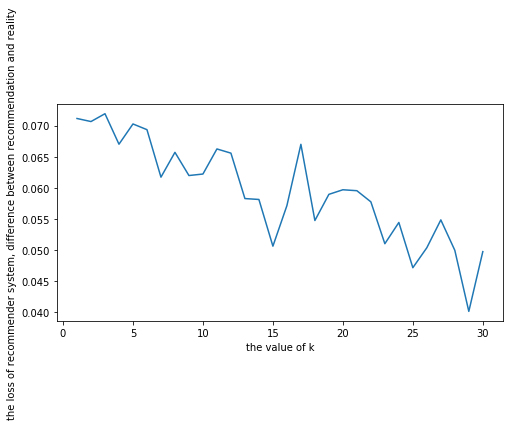

----------------------------- the execution ends here -----------------------------------------


In [49]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

# training epoch is 6000

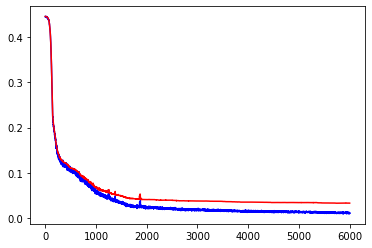

autoencoder finished


In [50]:
a = autoencoder(num_epochs=6000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.1119163357848872
loss_difference_between_true_label_and_probability : 0.10790106863462205
loss_difference_between_true_label_and_probability : 0.10930074171544463
loss_difference_between_true_label_and_probability : 0.10466723575777662
loss_difference_between_true_label_and_probability : 0.10324412559976671
loss_difference_between_true_label_and_probability : 0.10225818286435404
loss_difference_between_true_label_and_probability : 0.09915355119778503
loss_difference_between_true_label_and_probability : 0.09644590887781102
loss_difference_between_true_label_and_probability : 0.09651228447886116
loss_difference_between_true_label_and_probability : 0.08709325242667669
loss_difference_between_true_label_and_probability : 0.06570224802712238
loss_difference_between_true_label_and_probability : 0.09249356808795096
loss_difference_between_true_label_and_probability :

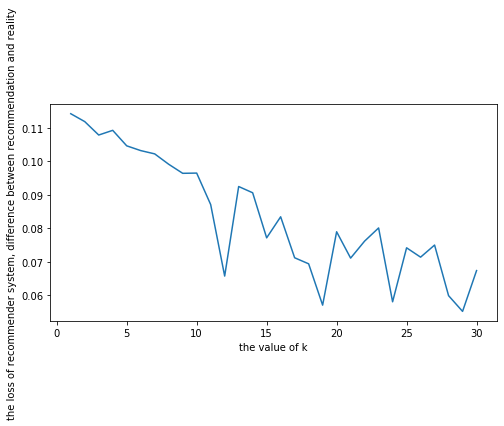

----------------------------- the execution ends here -----------------------------------------


In [51]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.07068772366020996
loss_difference_between_true_label_and_probability : 0.07154420149795773
loss_difference_between_true_label_and_probability : 0.06738445593568473
loss_difference_between_true_label_and_probability : 0.06722336670659315
loss_difference_between_true_label_and_probability : 0.066800877513436
loss_difference_between_true_label_and_probability : 0.05889604938979452
loss_difference_between_true_label_and_probability : 0.06492795370087771
loss_difference_between_true_label_and_probability : 0.06842559342956356
loss_difference_between_true_label_and_probability : 0.06313034916910129
loss_difference_between_true_label_and_probability : 0.06293840537659179
loss_difference_between_true_label_and_probability : 0.06466736450835933
loss_difference_between_true_label_and_probability : 0.055472282507777734
loss_difference_between_true_label_and_probability :

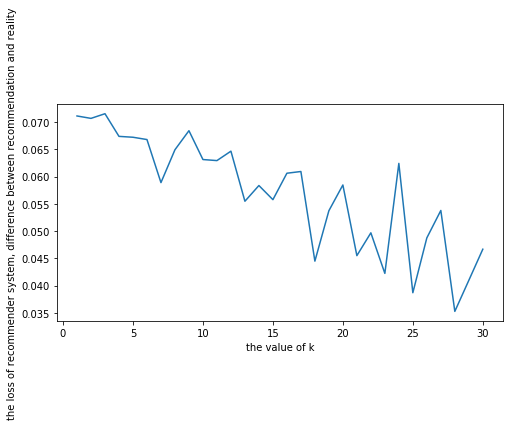

----------------------------- the execution ends here -----------------------------------------


In [52]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

In [ ]:
# training epoch is 5000

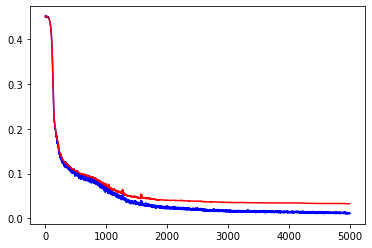

autoencoder finished


In [53]:
a = autoencoder(num_epochs=5000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.1090955038798281
loss_difference_between_true_label_and_probability : 0.10882618727996157
loss_difference_between_true_label_and_probability : 0.10782752025553884
loss_difference_between_true_label_and_probability : 0.10586817047290636
loss_difference_between_true_label_and_probability : 0.10578961808959839
loss_difference_between_true_label_and_probability : 0.0877976899440272
loss_difference_between_true_label_and_probability : 0.1051849339986522
loss_difference_between_true_label_and_probability : 0.07734091929979024
loss_difference_between_true_label_and_probability : 0.09562037235317297
loss_difference_between_true_label_and_probability : 0.08027318059165311
loss_difference_between_true_label_and_probability : 0.09037220375343158
loss_difference_between_true_label_and_probability : 0.0770687415685776
loss_difference_between_true_label_and_probability : 0.

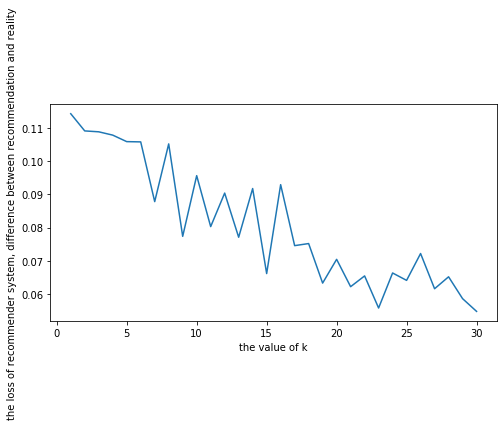

----------------------------- the execution ends here -----------------------------------------


In [54]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.06983921881329438
loss_difference_between_true_label_and_probability : 0.06888183610620159
loss_difference_between_true_label_and_probability : 0.06388653015314208
loss_difference_between_true_label_and_probability : 0.0645083490143774
loss_difference_between_true_label_and_probability : 0.06345785923957889
loss_difference_between_true_label_and_probability : 0.054326095382116246
loss_difference_between_true_label_and_probability : 0.05035511723348511
loss_difference_between_true_label_and_probability : 0.05686870742636273
loss_difference_between_true_label_and_probability : 0.04802029368963806
loss_difference_between_true_label_and_probability : 0.05080004604187127
loss_difference_between_true_label_and_probability : 0.04994994288639197
loss_difference_between_true_label_and_probability : 0.049868259512532646
loss_difference_between_true_label_and_probability

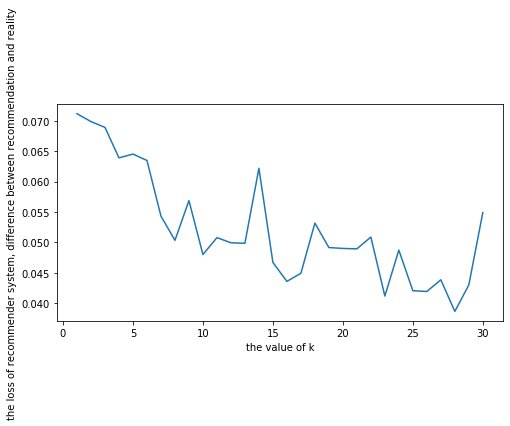

----------------------------- the execution ends here -----------------------------------------


In [55]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

In [56]:
# training epoch is 4000

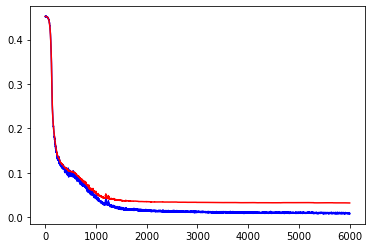

autoencoder finished


In [57]:
a = autoencoder(num_epochs=6000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.11229977585114649
loss_difference_between_true_label_and_probability : 0.10924533935574375
loss_difference_between_true_label_and_probability : 0.09202892402570685
loss_difference_between_true_label_and_probability : 0.10334344093937813
loss_difference_between_true_label_and_probability : 0.09221639723157064
loss_difference_between_true_label_and_probability : 0.08959845546217864
loss_difference_between_true_label_and_probability : 0.09003033638367912
loss_difference_between_true_label_and_probability : 0.08615727704564129
loss_difference_between_true_label_and_probability : 0.07955110437478383
loss_difference_between_true_label_and_probability : 0.08352998902667827
loss_difference_between_true_label_and_probability : 0.09297192050557655
loss_difference_between_true_label_and_probability : 0.0779305408430381
loss_difference_between_true_label_and_probability :

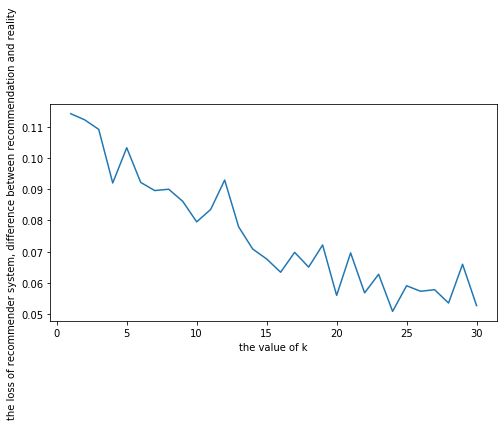

----------------------------- the execution ends here -----------------------------------------


In [58]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.07034376585236773
loss_difference_between_true_label_and_probability : 0.07030434414395859
loss_difference_between_true_label_and_probability : 0.06729929810995039
loss_difference_between_true_label_and_probability : 0.06390576718225488
loss_difference_between_true_label_and_probability : 0.06804122385400509
loss_difference_between_true_label_and_probability : 0.06242414069235862
loss_difference_between_true_label_and_probability : 0.05796331629608549
loss_difference_between_true_label_and_probability : 0.059544834503788356
loss_difference_between_true_label_and_probability : 0.05696752058392439
loss_difference_between_true_label_and_probability : 0.046984753847570185
loss_difference_between_true_label_and_probability : 0.05495074700610792
loss_difference_between_true_label_and_probability : 0.04908791191547452
loss_difference_between_true_label_and_probabilit

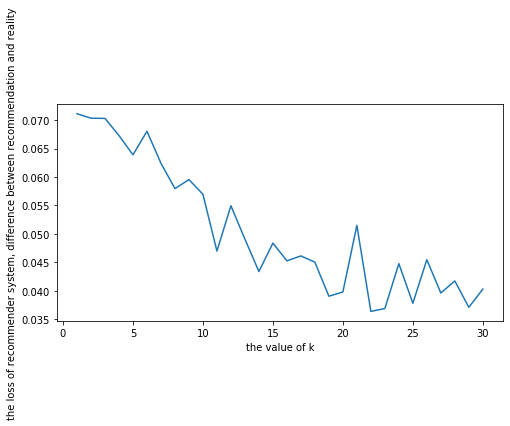

----------------------------- the execution ends here -----------------------------------------


In [59]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

In [ ]:
# training epoch is 3000

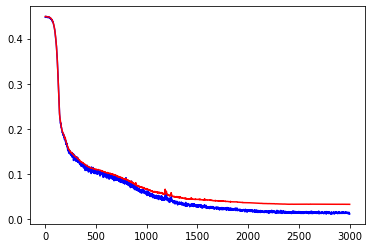

autoencoder finished


In [60]:
a = autoencoder(num_epochs=3000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.11277183397626594
loss_difference_between_true_label_and_probability : 0.11034640850817551
loss_difference_between_true_label_and_probability : 0.10453470989753254
loss_difference_between_true_label_and_probability : 0.11067125358306283
loss_difference_between_true_label_and_probability : 0.09111627698358582
loss_difference_between_true_label_and_probability : 0.08442909903793404
loss_difference_between_true_label_and_probability : 0.09713905915617939
loss_difference_between_true_label_and_probability : 0.0840250452270914
loss_difference_between_true_label_and_probability : 0.08365523722750255
loss_difference_between_true_label_and_probability : 0.0870800059318493
loss_difference_between_true_label_and_probability : 0.0814148959697648
loss_difference_between_true_label_and_probability : 0.08239731915693746
loss_difference_between_true_label_and_probability : 0

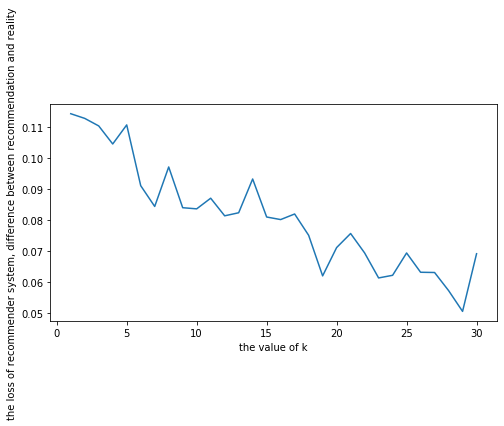

----------------------------- the execution ends here -----------------------------------------


In [61]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.0706231232511824
loss_difference_between_true_label_and_probability : 0.07318608342300487
loss_difference_between_true_label_and_probability : 0.0632025740890337
loss_difference_between_true_label_and_probability : 0.07162711461522404
loss_difference_between_true_label_and_probability : 0.05424719958259632
loss_difference_between_true_label_and_probability : 0.050188706857098024
loss_difference_between_true_label_and_probability : 0.051193993082422146
loss_difference_between_true_label_and_probability : 0.05930516825451448
loss_difference_between_true_label_and_probability : 0.05693555687570662
loss_difference_between_true_label_and_probability : 0.04619677113721879
loss_difference_between_true_label_and_probability : 0.044729107242605586
loss_difference_between_true_label_and_probability : 0.053197417076298006
loss_difference_between_true_label_and_probabilit

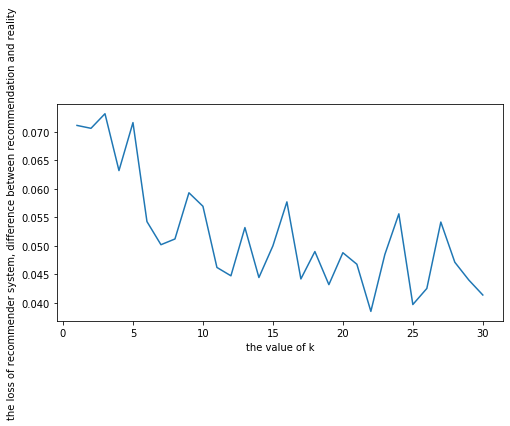

----------------------------- the execution ends here -----------------------------------------


In [62]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

In [ ]:
# training epoch is 2000

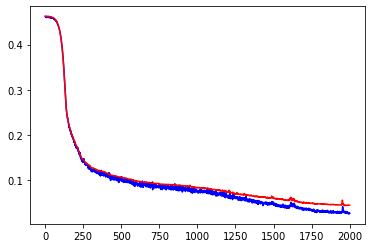

autoencoder finished


In [63]:
a = autoencoder(num_epochs=2000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.11286160916123346
loss_difference_between_true_label_and_probability : 0.11053393751513417
loss_difference_between_true_label_and_probability : 0.1081319934353401
loss_difference_between_true_label_and_probability : 0.1055556694286351
loss_difference_between_true_label_and_probability : 0.10536809221505122
loss_difference_between_true_label_and_probability : 0.1018663326687984
loss_difference_between_true_label_and_probability : 0.0771718962556876
loss_difference_between_true_label_and_probability : 0.09612147736732962
loss_difference_between_true_label_and_probability : 0.08591773955515956
loss_difference_between_true_label_and_probability : 0.08651570758409223
loss_difference_between_true_label_and_probability : 0.09260819012739194
loss_difference_between_true_label_and_probability : 0.08920567187986973
loss_difference_between_true_label_and_probability : 0.

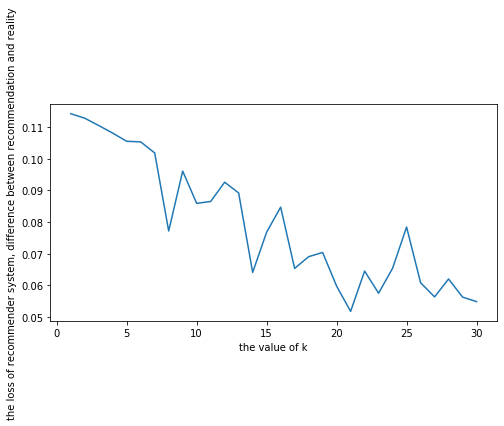

----------------------------- the execution ends here -----------------------------------------


In [64]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.07120179372180106
loss_difference_between_true_label_and_probability : 0.07019943192128562
loss_difference_between_true_label_and_probability : 0.07058677660096817
loss_difference_between_true_label_and_probability : 0.07151903994247658
loss_difference_between_true_label_and_probability : 0.07169476436652837
loss_difference_between_true_label_and_probability : 0.07028761201125018
loss_difference_between_true_label_and_probability : 0.058074395114384794
loss_difference_between_true_label_and_probability : 0.0615822261553346
loss_difference_between_true_label_and_probability : 0.06707629974563421
loss_difference_between_true_label_and_probability : 0.05826092513865993
loss_difference_between_true_label_and_probability : 0.05518391757617287
loss_difference_between_true_label_and_probability : 0.05988729132420895
loss_difference_between_true_label_and_probability 

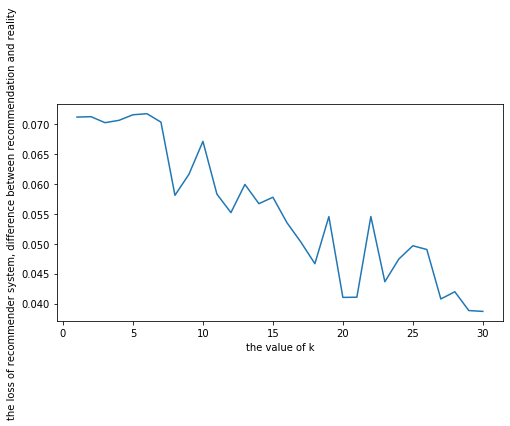

----------------------------- the execution ends here -----------------------------------------


In [65]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

In [ ]:
# training epoch is 1000

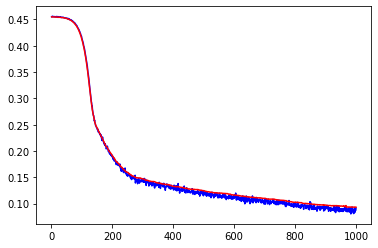

autoencoder finished


In [69]:
a = autoencoder(num_epochs=1000, denoising=False, masking=0.5, display_step=200)

compressed_training_data = a.compressed_train

original_training_data = a.train

compressed_testing_data = a.compressed_test
original_testing_data = a.test

loss_difference_between_true_label_and_probability : 0.11427670279380432
loss_difference_between_true_label_and_probability : 0.11234302018899862
loss_difference_between_true_label_and_probability : 0.10996584984872346
loss_difference_between_true_label_and_probability : 0.10834508646055503
loss_difference_between_true_label_and_probability : 0.08523429563075381
loss_difference_between_true_label_and_probability : 0.09600289694037027
loss_difference_between_true_label_and_probability : 0.08534236543769669
loss_difference_between_true_label_and_probability : 0.08147345949146614
loss_difference_between_true_label_and_probability : 0.08133391417780976
loss_difference_between_true_label_and_probability : 0.09225410376190196
loss_difference_between_true_label_and_probability : 0.09320194916607911
loss_difference_between_true_label_and_probability : 0.06903487031711777
loss_difference_between_true_label_and_probability : 0.07525010217479706
loss_difference_between_true_label_and_probability 

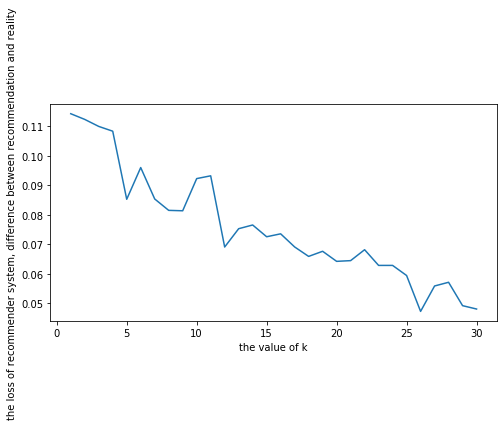

----------------------------- the execution ends here -----------------------------------------


In [70]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')

loss_difference_between_true_label_and_probability : 0.07113042126873691
loss_difference_between_true_label_and_probability : 0.06850136222424981
loss_difference_between_true_label_and_probability : 0.06744548079325301
loss_difference_between_true_label_and_probability : 0.06490522611744383
loss_difference_between_true_label_and_probability : 0.06451300091092424
loss_difference_between_true_label_and_probability : 0.061596697758373654
loss_difference_between_true_label_and_probability : 0.059996526389276224
loss_difference_between_true_label_and_probability : 0.05770083724528672
loss_difference_between_true_label_and_probability : 0.06052349817709329
loss_difference_between_true_label_and_probability : 0.05061217807550254
loss_difference_between_true_label_and_probability : 0.059179503475965144
loss_difference_between_true_label_and_probability : 0.05916317433393946
loss_difference_between_true_label_and_probability : 0.060838196604631245
loss_difference_between_true_label_and_probabil

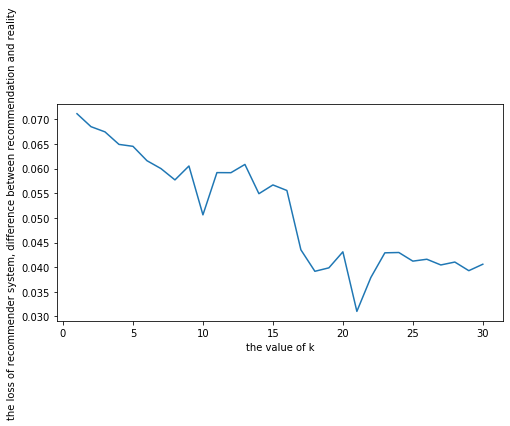

----------------------------- the execution ends here -----------------------------------------


In [71]:
#n_clusters =20
train_loss = []
for n_clusters in np.arange(1,31):
    average_loss_with_different_k_values = []

    estimator,label_pred,centroids = run_kmeans(n_clusters)

    clusters = fill_the_clusters(label_pred)

    # print(len(clusters))

    loss_difference_between_true_label_and_probability = calculate_loss2(clusters)

    # print('k is :                                               %s' % n_clusters)
    l = np.average(loss_difference_between_true_label_and_probability)
    # print(n_clusters, np.average(loss_difference_between_true_label_and_probability))

    print('loss_difference_between_true_label_and_probability : %s'% np.average(loss_difference_between_true_label_and_probability))
    average_loss_with_different_k_values.append((n_clusters,l))
    train_loss.append(np.average(loss_difference_between_true_label_and_probability))


xs = np.arange(1,31)
ys = train_loss
fig, ax = plt.subplots(figsize=(8, 4))
ys = np.reshape(ys,(30,-1))
ax.plot(xs, ys)
ax.set_xlabel('the value of k')
ax.set_ylabel('the loss of recommender system, difference between recommendation and reality')
plt.show()

print('----------------------------- the execution ends here -----------------------------------------')